# Big Data Project - XiachufangÔºà‰∏ãÂé®ÊàøÔºâ

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import json
import jieba
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs import Bar
import plotly.offline as off
from sklearn.manifold import TSNE

# 1. 24-hour pop recipes in Xiachufang

In [ ]:
url_page1='https://www.xiachufang.com/activity/site/?order=pop&page='
urls = []
for i in range(1,51):
    url = url_page1 + str(i)
    urls.append(url)

def get_one_page(url):
    r = requests.get(url)
    mypage = bs4.BeautifulSoup(r.text, 'lxml')
    mycooks = mypage.find_all('div', attrs={'class': 'dish-280'})


    cooks = []
    for mycook in mycooks:
    
        title = mycook.find('p',attrs={'name ellipsis red-font'}).find('a').text
        desc = mycook.find('p',attrs={'desc'}).text
        time = mycook.find('p',attrs={'pure-u-1-2'}).text
        like = mycook.find('span',attrs={'n-diggs'}).text
        comment = mycook.find('span',attrs={'n-comments'}).text
        user = mycook.find('div',attrs={'author clearfix ellipsis'}).find('a').text.strip()
        location = mycook.find('span',attrs={'location gray-font'})
        if location == None:
            location = location 
        else:
            location = location.text.strip()
            
    
        cooks.append([title,desc,time,like,comment,user,location])
    
    return cooks

all_cooks = []
for url in urls:
    all_cooks.extend(get_one_page(url))

df = pandas.DataFrame(all_cooks, columns=['title','desc','time','like',
                                      'comment','user','location'])
#df
#location =df['location'].value_counts().plot(kind='bar')
#location

all_location = []
for x in df['location']:
    if x == None:
        all_location.append(x)
    else:
        all_location.append(x[1:3])
df['location'] = all_location

s = df['location'].value_counts()
d = s.to_frame().reset_index().rename(columns={'index': 'name', 'location': 'value'})
list(d.T.to_dict().values())

Based on location data, we plot user disribution map of China which can be viewed in ppt.

# 2. Monthly pop recipes in Xiachufang

In [ ]:
url_one = 'https://www.xiachufang.com/explore/?page='
urls = []
for i in range(1,40):
    url = url_one + str(i)
    urls.append(url)
    
all_names = []
all_hots = []
all_authors=[]
all_materials=[]


for url in urls:
    pages = BeautifulSoup(requests.get(url).text)

    
    names = []
    for n in pages.find_all('p', attrs={'class':'name'}):
        names.append(n.text.strip())
        
        
    authors = []
    for a in pages.find_all('p', attrs={'class':'author'}):
        authors.append(a.text.strip())
        
    
    hots = []
    for h in pages.find_all('span', attrs={'class': 'bold'}):
        hots.append(h.text)
        
        
    materials=[]
    for m in pages.find_all('p', attrs={'class':'ing ellipsis'}):
        materials.append(m.text.strip())
    
   
    
    all_names.extend(names)
    all_hots.extend(hots)
    all_authors.extend(authors)
    all_materials.extend(materials)
    
    
    for index,item in enumerate(all_hots):
        all_hots [index] = int(item)
#strËΩâÊï¥Âûã
    
with open('monthly pop recipes.csv','w') as f:
    writer = csv.writer(f)
    header = ['names','hots','authors','materials']
    writer.writerow(header)
    writer.writerows(zip(all_names,all_hots,all_authors,all_materials))

In [2]:
df= pd.read_csv("monthly pop recipes.csv")
#df
#‰∏ÉÂ§©‰πãÂÖßÊúÄÁÜ±ÈñÄÁöÑËèúË≠ú ÂåÖÊã¨ÂêçÁ®±ÔºåÊúâÂ§öÂ∞ë‰∫∫ÂÅöÈÅéÔºåÁôºÂ∏ÉËÄÖÔºåËèúË≠ú

In [3]:
rank = df.sort_values(by = ['hots'],ascending=False)
#rank
#ÊåâÁÖßÁÜ±Â∫¶Ôºà‰∏ÉÂ§©ÂÖßÂ§öÂ∞ë‰∫∫ÂÅöÈÅé ÊéíÂ∫èÔºâ

In [4]:
data = [go.Bar(
    
            x=rank['names'],
            y=rank['hots'][:10],
            marker= dict(
            color=['rgba(222,45,38,0.8)','rgba(204,204,204)', 
               'rgba(204,204,204)', 'rgba(204,204,204)',
               'rgba(204,204,204)','rgba(204,204,204)','rgba(222,45,38,0.8)','rgba(204,204,204)', 
               'rgba(204,204,204)', 'rgba(204,204,204)', 'rgba(204,204,204)'])
    )]

iplot({"data":data,
     "layout":Layout(title = "Top 10 in a Week")})

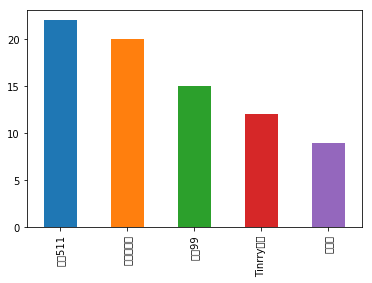

In [5]:
au=df['authors'].value_counts()[:5].plot(kind='bar')
#au.reset_index()
#Âá∫ÁèæÈ†ªÁéáÊúÄÈ´òÁöÑ‰ΩúËÄÖ
#au
#Áî±‰∫é‰ΩúËÄÖÂêçÁß∞‰∏∫‰∏≠ÊñáÔºåÂêéÊúüÂà©Áî®psÊ†áÊ≥®

In [6]:
all_ma=df['materials'].value_counts().index
#all_ma

In [7]:
all_ma=[]
for material in df['materials']:
    m=list(jieba.cut(material))
    all_ma.extend(m)
#all_ma

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/sk/fp6ry8ss3md7gdyr3b1qcnb80000gn/T/jieba.cache
Loading model cost 1.317 seconds.
Prefix dict has been built succesfully.


In [9]:
ma_count={}
for material in all_ma:
    if material not in ma_count:
        ma_count[material] = 1
    else:
        ma_count[material] = ma_count[material]+1
#ma_count

# 3. Foreign recipes in Xiachufang

In [ ]:
def start_requests(url):
    r = requests.get(url)
    return r.content

def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_yues= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_yue in cooking_yues:
        url = cooking_yue.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['rate'] = soup.find('span', attrs={'class':'number'}).text
    mydict['hot'] = soup.find('div',attrs={'class':'cooked float-left'}).find('span').text
    mydict['time'] = soup.find('span', attrs={'itemprop':'datePublished'}).text
    return mydict

def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('1_dongnanya_hot.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(1,11):
        url = 'https://www.xiachufang.com/category/51965/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂




if __name__ == '__main__':
    result_list = []
    main()


In [ ]:
def start_requests(url):
    r = requests.get(url)
    return r.content

def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_yues= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_yue in cooking_yues:
        url = cooking_yue.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['rate'] = soup.find('span', attrs={'class':'number'}).text
    mydict['hot'] = soup.find('div',attrs={'class':'cooked float-left'}).find('span').text
    mydict['time'] = soup.find('span', attrs={'itemprop':'datePublished'}).text
    return mydict

def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('2_korean_hot.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(10):
        url = 'https://www.xiachufang.com/category/40080/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂
    


if __name__ == '__main__':
    result_list = []
    main()

In [ ]:
def start_requests(url):
    r = requests.get(url)
    return r.content

def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_yues= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_yue in cooking_yues:
        url = cooking_yue.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['rate'] = soup.find('span', attrs={'class':'number'}).text
    mydict['hot'] = soup.find('div',attrs={'class':'cooked float-left'}).find('span').text
    mydict['time'] = soup.find('span', attrs={'itemprop':'datePublished'}).text
    return mydict

def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('3_japanese_hot.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(10):
        url = 'https://www.xiachufang.com/category/40081/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂
    


if __name__ == '__main__':
    result_list = []
    main()

In [ ]:
def start_requests(url):
    r = requests.get(url)
    return r.content

def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_yues= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_yue in cooking_yues:
        url = cooking_yue.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['rate'] = soup.find('span', attrs={'class':'number'}).text
    mydict['hot'] = soup.find('div',attrs={'class':'cooked float-left'}).find('span').text
    mydict['time'] = soup.find('span', attrs={'itemprop':'datePublished'}).text
    return mydict

def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('4_western_hot.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(10):
        url = 'https://www.xiachufang.com/category/51305/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂
    


if __name__ == '__main__':
    result_list = []
    main()

In [10]:
#Áî®PandasÊâìÂºÄ‰∏úÂçó‰∫ö„ÄÅÈü©Âºè„ÄÅÊó•Âºè„ÄÅË•øÂºèËèúÁ≥ª
with open('1_dongnanya_hot.json', 'r') as f1:
    data1 = json.load(f1)
df1 = pd.DataFrame(data1)

with open('2_korean_hot.json', 'r') as f2:
    data2 = json.load(f2)
df2 = pd.DataFrame(data2)

with open('3_japanese_hot.json', 'r') as f3:
    data3 = json.load(f3)
df3 = pd.DataFrame(data3)

with open('4_western_hot.json', 'r') as f4:
    data4 = json.load(f4)
df4 = pd.DataFrame(data4)

dfs = [df1, df2, df3,df4]

In [11]:
#ÊääÁÉ≠Èó®Á®ãÂ∫¶‰ªéÂ≠óÁ¨¶‰∏≤ÂèòÊàêÊï∞Â≠óÁ±ªÂûã
all_hot = []
for x in df1['hot']:
    all_hot.append(float(x))
    
df1['hot']=all_hot
#df1.sort_values(by = ['hot'], ascending = False)

all_hot_2 = []
for x in df2['hot']:
    all_hot_2.append(float(x))
    
df2['hot']=all_hot_2

all_hot_3 = []
for x in df3['hot']:
    all_hot_3.append(float(x))
    
df3['hot']=all_hot_3

all_hot_4 = []
for x in df4['hot']:
    all_hot_4.append(float(x))
    
df4['hot']=all_hot_4

In [12]:
#ÊääËØÑÂàÜ‰ªéÂ≠óÁ¨¶‰∏≤ÂèòÊàêÊï∞Â≠óÁ±ªÂûã
all_rate = []
for x in df1['rate']:
    all_rate.append(float(x))
   
df1['rate']=all_rate

all_rate_2 = []
for x in df2['rate']:
    all_rate_2.append(float(x))
   
df2['rate']=all_rate_2

all_rate_3 = []
for x in df3['rate']:
    all_rate_3.append(float(x))
   
df3['rate']=all_rate_3

all_rate_4 = []
for x in df4['rate']:
    all_rate_4.append(float(x))
   
df4['rate']=all_rate_4


In [13]:
all_rate = []
for x in df1['rate']:
    if x > 10:
        x = 0
    else:
        x = x
    all_rate.append(x)

df1['rate'] = all_rate

all_rate_2 = []
for x in df2['rate']:
    if x > 10:
        x = 0
    else:
        x = x
    all_rate_2.append(x)

df2['rate'] = all_rate_2

all_rate_3 = []
for x in df3['rate']:
    if x > 10:
        x = 0
    else:
        x = x
    all_rate_3.append(x)

df3['rate'] = all_rate_3

all_rate_4 = []
for x in df4['rate']:
    if x > 10:
        x = 0
    else:
        x = x
    all_rate_4.append(x)

df4['rate'] = all_rate_4

In [14]:
# ‰∏úÂçó‰∫ö„ÄÅÈü©Âºè„ÄÅÊó•Âºè„ÄÅË•øÂºèËèúË∞±Âπ¥Â∫¶ÁÉ≠Èó®Ë∂ãÂäøÂõæ
# The Hot Trend of Southeastern, Korean, Japanese and Western Recipes

df1_hot = df1.sort_values(by = 'time', ascending = False)
data_trend1 = [go.Scatter(
    x = df1_hot['time'],
    y = df1_hot['hot'].values,
    mode = 'lines+markers',
    name = 'lines+markers',
    text = df1_hot['name'],
    marker=dict(
        color='rgb(255,168,52)',
        line=dict(
            color='rgb(8,48,107)'
        )
    ),

)]

layout = dict(title = 'Hot of Southeast Asia Recipes',
              xaxis= dict(
                title= 'Time',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Hot(unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )

fig = dict(data=data_trend1, layout=layout)
iplot(fig)


In [15]:
df1.sort_values(by='hot',ascending = False)[:10]

hot      name  rate                 time
2    2197.0     Ê≥∞ÂºèÂíñÂñ±È•≠   8.5  2012-06-02 19:01:26
22   1566.0     ÂçóÊ¥ãÈõ™Ëä±Á≥ï   8.4  2011-10-14 20:59:11
0    1488.0      Ë∂äÂçóÊò•Âç∑   7.6  2012-08-23 17:52:17
80   1399.0     Ê≥∞ÂºèÂíñÂñ±Ëôæ   7.7  2011-10-16 02:31:20
9     888.0    Ê≥∞ÂºèËè†ËêùÈ∏°È•≠   7.9  2011-12-23 16:09:42
50    836.0      ÂÜ¨Èò¥ÂäüÊ±§   6.8  2011-12-13 12:43:38
69    686.0   Ëè†ËêùËäùÂ£´Â∞èÁîúÁÇπ   8.4  2012-12-03 16:32:52
41    574.0  Ê≥∞ÂºèÂÜ¨Èò¥ÂäüÊ±§ÁÅ´ÈîÖ   7.9  2012-05-05 17:03:29
7     524.0   Ê≥∞ÂºèÊ§∞ÊµÜÂíñÂñ±È∏°   7.8  2012-09-05 23:18:36
172   431.0      ÂÜ¨Èò¥ÂäüÊ±§   7.4  2011-03-01 17:50:13

In [16]:
df2_hot = df2.sort_values(by = 'time', ascending = False)
data_trend2 = [go.Scatter(
    x = df2_hot['time'],
    y = df2_hot['hot'].values,
    mode = 'lines+markers',
    name = 'lines+markers',
    text = df2_hot['name'],
    marker=dict(
        color='rgb(232,74,12)',
        line=dict(
            color='rgb(8,48,107)'
        )
    ),

)]

layout = dict(title = 'Trend of Korean Recipes',
              xaxis= dict(
                title= 'Time',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Hot(unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )

fig = dict(data=data_trend2, layout=layout)
iplot(fig)

In [17]:
df2.sort_values(by='hot',ascending = False)[:10]

hot                   name  rate                 time
48  6760.0  Èü©ÂºèËæ£ÁÇíÂπ¥Á≥ïÔºàorÁΩëÁ∫¢ËäùÂ£´Â•óË∑Ø‰πãËäùÂøÉÂπ¥Á≥ïÔºâ   7.9  2014-02-08 06:39:38
47  4341.0                  Èü©ÂºèÂçóÁìúÁ≤•   8.0  2011-06-05 22:09:00
24  3685.0                 Èü©ÂºèÁ¥´ËèúÂåÖÈ•≠   7.9  2011-03-27 12:58:54
49  3540.0                Èü©ÂºèËäùÂ£´ÈÉ®ÈòüÈîÖ   7.8  2012-11-13 21:23:51
6   3427.0                 Èü©ÂºèÁÉ§‰∫îËä±ËÇâ   8.3  2014-05-26 19:53:05
11  3372.0                   Èü©ÂºèÊãåÈ•≠   7.9  2011-11-02 17:14:18
33  3062.0                  Èü©ÂºèÂçóÁìúÁ≤•   8.1  2013-04-11 18:00:05
38  2394.0                 Èü©ÂºèËæ£ÁÇíÂπ¥Á≥ï   7.4  2012-12-12 20:45:55
0   1995.0          Èü©ÂõΩÈÉ®ÈòüÈîÖÊãâÈù¢ÈîÖÔºàË∂ÖÂ•ΩÂêÉÔºâ   8.1  2015-03-26 02:04:27
18  1986.0           Èü©ÂºèÂúüË±ÜÈ•ºÔºàÂ•ΩÂêÉÂèàËê•ÂÖªÔºâ   7.1  2013-10-24 15:32:30

In [18]:
df3_hot = df3.sort_values(by = 'time', ascending = False)
data_trend3 = [go.Scatter(
    x = df3_hot['time'],
    y = df3_hot['hot'].values,
    mode = 'lines+markers',
    name = 'lines+markers',
    text = df3_hot['name'],
    marker=dict(
        color='rgb(255,0,0)',
        line=dict(
            color='rgb(8,48,107)'
        )
    ),
)]

layout = dict(title = 'Trend of Japanese Recipes',
              xaxis= dict(
                title= 'Time',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Hot(unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )

fig = dict(data=data_trend3, layout=layout)
iplot(fig)

In [19]:
df3.sort_values(by='hot',ascending = False)[:10]

hot                      name  rate                 time
12   12162.0  Êó•ÂºèÂíñÂñ±È∏°È•≠ÔºÅÔºÅÊúÄÊ≠£ÂÆóÊó•Êú¨ÂÆ∂Â∫≠ÂÅöÊ≥ïÔºÅÁÆÄÂçïÂèàÂ•ΩÂêÉÔºÅ   8.6  2012-10-21 18:09:03
60   10881.0                  Êó•ÂºèÈ¶ôÊµìÁÇº‰π≥Èù¢ÂåÖ   8.6  2014-11-03 20:49:26
119   5782.0                    Êó•Êú¨Ê£âËä±ËõãÁ≥ï   7.9  2013-07-31 23:26:52
19    4782.0                  Êó•ÂºèË±Ü‰π≥ÁõíÂ≠êËõãÁ≥ï   7.7  2016-12-13 17:09:04
16    4662.0                     Êó•ÂºèÁ∫¢Ë±ÜÂåÖ   8.5  2016-03-06 23:53:45
178   4544.0      ‰∏çÊòìÊ∂àÊ≥°ÁöÑÊó•ÂºèÊñπÊ≥ïÔºåÂèØÂèØÊµ∑ÁªµËõãÁ≥ïÁôæÊàòÂÆùÂÖ∏   8.4  2013-12-12 21:00:10
6     3926.0                  Ë∂ÖÊ≠£ÂÆóÊó•ÂºèËõãÂåÖÈ•≠   7.8  2014-02-22 20:48:09
27    3910.0                    Êó•ÂºèÁÖßÁÉßÈ∏°ËÖø   7.7  2011-02-16 18:50:24
114   3682.0                    Êó•ÂºèËäùÂ£´ËõãÁ≥ï   8.2  2011-11-06 16:49:16
85    3074.0                   Êó•ÂºèÊ£âËä±ËõãÁ≥ïÂç∑   8.5  2012-05-07 14:15:21

In [20]:
df4_hot = df4.sort_values(by = 'time', ascending = False)
data_trend4 = [go.Scatter(
    x = df4_hot['time'],
    y = df4_hot['hot'].values,
    mode = 'lines+markers',
    name = 'lines+markers',
    text = df4_hot['name'],
    marker=dict(
        color='rgb(129,13,255)',
        line=dict(
            color='rgb(8,48,107)'
        )
    ),
)]

layout = dict(title = 'Trend of Western Recipes',
              xaxis= dict(
                title= 'Time',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Hot(unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )

fig = dict(data=data_trend4, layout=layout)
iplot(fig)

In [21]:
df4.sort_values(by='hot',ascending = False)[:10]

hot                       name  rate                 time
2    472.0           Ëè≤ÂäõÁâõÊéíÔºàÂÆåÊï¥ÁâàÂø´Êç∑Êñπ‰æøÁöÑË•øÈ§êÔºâ   8.1  2014-04-20 18:46:54
27   403.0             Â•ΩÂêÉÁÆÄÂçïÁöÑË•øÈ§ê--ËäùÂ£´ÁÑóÊÑèÈù¢   7.6  2014-12-15 21:52:24
39   233.0           Ë•øÂºè‰π≥ÈÖ™Ê¨ßÂßÜËõã omelette   7.6  2012-08-20 04:20:21
69   190.0                       Ë•øÂºèÁÇíËõã   8.4  2011-10-25 13:59:40
60   183.0     Scrambled EggsÔºàË•øÂºèÈªÑÊ≤πÁÇíËõãÔºâ   8.0  2012-05-24 20:54:14
56   176.0      Ê†∏Ê°ÉÂçóÁìúÊÑèÈù¢/ÈÄöÂøÉÁ≤â<ÂÖ®‰∏ñÁïåÊúÄÁÆÄÂçïÁöÑË•øÈ§ê>   8.8  2016-08-03 15:19:28
4    117.0                       Ë•øÂºèÊµìÊ±§   8.2  2014-05-10 15:30:27
135  107.0  „ÄêÊõºËææÂ∞èÈ¶Ü„ÄëÊùæÊùæËΩØËΩØËøòÂ∏¶Â•∂È¶ôÁöÑË•øÂºèÂ§ßÈ¶íÂ§¥ÔºöÁâõÂ•∂ÂêêÂè∏   7.7  2017-05-17 11:47:23
13    80.0         ÁâπÂà´Â•ΩÂêÉÁöÑ‰∏ÄÈÅìË•øÈ§êËèú-Â•∂ÈÖ™È¶ôÁÉ§Áï™ËåÑÁõÖ   7.5  2013-03-25 16:24:53
29    80.0                    Êú¨Ê†ºË•øÂºèÈ∏°ËÉ∏ËÇâ   8.8  2015-07-20 23:52:33

In [22]:
# ‰∏úÂçó‰∫ö„ÄÅÈü©Âºè„ÄÅÊó•Âºè„ÄÅË•øÂºèËèúË∞±ËØÑÂàÜÂíåÁÉ≠Â∫¶ÂØπÊØîÂõæ
# The Comparision between Rate and Hot of Southeastern, Korean, Japanese and Western Recipes

data_rate1 = [go.Scatter(
    x = df1['rate'],
    y = df1['hot'],
    mode = 'markers',
    name = 'markers',
    text = df1['name'],
    marker=dict(
        color='rgb(255,168,52)',
        line=dict(
            color='rgb(255,168,52)',
            width = 5
        )
    )
)]
    
layout = dict(title = 'Rate and Hot of Southeast Asia Recipes',
              xaxis= dict(
                title= 'Rate',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Hot(unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )

fig = dict(data=data_rate1, layout=layout)
iplot(fig)

In [23]:
data_rate2 = [go.Scatter(
    x = df2['rate'],
    y = df2['hot'],
    mode = 'markers',
    name = 'markers',
    text = df2['name'],
    marker=dict(
        color='rgb(232,74,12)',
        line=dict(
            color='rgb(232,74,12)',
            width = 5
        )
    )
)]
    
layout = dict(title = 'Rate and Hot of Korean Recipes',
              xaxis= dict(
                title= 'Rate',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Hot(unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )

fig = dict(data=data_rate2, layout=layout)
iplot(fig)

In [24]:
data_rate3 = [go.Scatter(
    x = df3['rate'],
    y = df3['hot'],
    mode = 'markers',
    name = 'markers',
    text = df3['name'],
    marker=dict(
        color='rgb(255,0,0)',
        line=dict(
            color='rgb(255,0,0)',
            width = 5
        )
    )
)]
    
layout = dict(title = 'Rate and Hot of Japanese Recipes',
              xaxis= dict(
                title= 'Rate',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Hot(unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )

fig = dict(data=data_rate3, layout=layout)
iplot(fig)

In [25]:
data_rate4 = [go.Scatter(
    x = df4['rate'],
    y = df4['hot'],
    mode = 'markers',
    name = 'markers',
    text = df4['name'],
    marker=dict(
        color='rgb(129,13,255)',
        line=dict(
            color='rgb(129,13,255)',
            width = 5
        )
    )
)]
    
layout = dict(title = 'Rate and Hot of Western Recipes',
              xaxis= dict(
                title= 'Rate',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Hot(unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )

fig = dict(data=data_rate4, layout=layout)
iplot(fig)

# 4. Network of Chinese recipes in Xiachufang

In [27]:
with open('cooking_xiang.json', 'r') as f:
    data1 = json.load(f)
df1 = pd.DataFrame(data1)
df1['colour']=0

with open('cooking_hui.json', 'r') as f:
    data2 = json.load(f)
df2 = pd.DataFrame(data2)
df2['colour']=1

with open('cooking_lu.json', 'r') as f:
    data3 = json.load(f)
df3 = pd.DataFrame(data3)
df3['colour']=2

with open('cooking_min.json', 'r') as f:
    data4 = json.load(f)
df4 = pd.DataFrame(data4)
df4['colour']=3

with open('cooking_su.json', 'r') as f:
    data5 = json.load(f)
df5 = pd.DataFrame(data5)
df5['colour']=4

with open('cooking_yue.json', 'r') as f:
    data6 = json.load(f)
df6 = pd.DataFrame(data6)
df6['colour']=5

with open('cooking_zhe.json', 'r') as f:
    data7 = json.load(f)
df7 = pd.DataFrame(data7)
df7['colour']=6

with open('cooking_chuan.json', 'r') as f:
    data8 = json.load(f)
df8 = pd.DataFrame(data8)
df8['colour']=7

df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8], ignore_index=True)
df.drop_duplicates(subset=None, keep='first', inplace=False).head()

material        name  \
0  Â∞ñËæ£Ê§í\n\n                \n\n                   ...        Ëæ£Ê§íÁÇíËÇâ   
1  È∏°ÂøÉ\n\n\n\n\n\n\nÈ∏°ËÇù\n\n\n\n\n\n\nÈ∏°ËÉó\n\n\n\n\n\n...  ÊπòËèú10„ÄäÈÖ∏Ëæ£È∏°ÊùÇ„Äã   
2  Ë±ÜËÖê\n\n\n                    250ÂÖã\n            ...      ÊπòÂë≥ÂÜúÂÆ∂Ë±ÜËÖê   
3  È∏°Ëõã\n\n\n\n\n\n\nÊù≠Ê§í\n\n\n\n\n\n\n              ...    ÈáëÈí±Ëõã-ÁªèÂÖ∏ÊπòËèú   
4  Â§ßÈ±ºÂ§¥\n\n                \n\n\n\n\n\nÂâÅÊ§í\n\n\n\n\...  ÊπòËèú07„ÄäÂâÅÊ§íÈ±ºÂ§¥„Äã   

                                              recipe  colour  
0  Ëæ£Ê§íÊ¥óÂáÄÔºåÊªöÂàÄÂàáÔºåÂàáÂÆåÂÜçÊ¥ó‰∏ÄÈÅçÔºåÊª§ÊéâÂ§ö‰ΩôÁöÑËæ£Ê§íÁ±ΩÔºÅ\n\n\n\nÁå™ËÇâÂàáÊù°ÔºåÂπ∂Áî®‰∏ÄÂÖãÁôΩÁ≥ñÂíå5...       0  
1  ËÖåÂà∂È∏°ÊùÇÈ∏°ÂøÉÔºåÈ∏°ËÉóÔºåÈ∏°Êó∞ÔºåÈ∏°ËÇ†ÔºåÊîπÂàÄÂêéÂä†ÁõêÔºåÊñôÊ¥íÔºåÁôΩËÉ°Ê§íÁ≤âÔºåÈ∏°Á≤æÊäìÂåÄÔºåÂä†Ê∑ÄÁ≤âÊäìÂåÄÁ†ÅÂë≥„ÄÇ\n\...       0  
2  Èü≠ËèúÂàáÂ∞èÊÆµÔºåÂ§ßËíúÂàáÁ¢éÂ§áÁî®„ÄÇËÇâÊú´Áî®Â∞ëËÆ∏ÊñôÈÖíÂíåÈÖ±Ê≤πÂíåÊ≤πËÖåÂà∂5ÂàÜÈíü„ÄÇ\n\n\nË±ÜËÖêÂàáÂùóÂÖ•ÈîÖÂèåÈù¢ÁÖé...       0  
3  È∏°ËõãÁÖÆÁÜüÔºå‰∏ÄËà¨‰∏Ä‰∏™ËèúÊòØ3-4Êûö„ÄÇ\n\n\n\nÂâ•Â£≥ÔºåÂàá0.5cmÂéöÊ†∑Â≠ê„ÄÇÂàáÁöÑÊó∂ÂÄôÁî®Ê∞¥ÊûúÂàÄ‰∏ç...       0  
4  È±ºÂ§¥Á†ÅÂë≥„ÄÇËÉñÂ§¥È±º‰∏≠Èó¥ÂàáÂºÄ‰∏§ÁâáÔºå‰∏çË¶ÅÂàáÊñ≠ÔºåËÇâÂéöÁöÑÈÉ®ÂàÜÂâû‰∏äËä±ÂàÄÔºåÈ±ºÈ™®Êñ©Êñ≠„ÄÇËë±Ëä±ÂßúÁâáÊîæÂú®ÊñôÈÖí‰∏≠Ê≥°‰∏Ä...       0

In [28]:
a_m=[]
for i in open('material_list.txt'):
    i=i.strip('\n')
    a_m.append(i)
len(a_m)

1389

In [29]:
def get_material_value1(v):
    temp_data = []
    for r in a_m:
        if r in v:
            temp_data.append(1)
        else:
            temp_data.append(0)
    return temp_data

In [30]:
df['material-value'] = df['recipe'].apply(get_material_value1)

In [31]:
A = list(df['material-value'].values)
len(A)

1497

In [32]:
X = np.array(A)

In [33]:
X = np.array(A)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1497, 2)

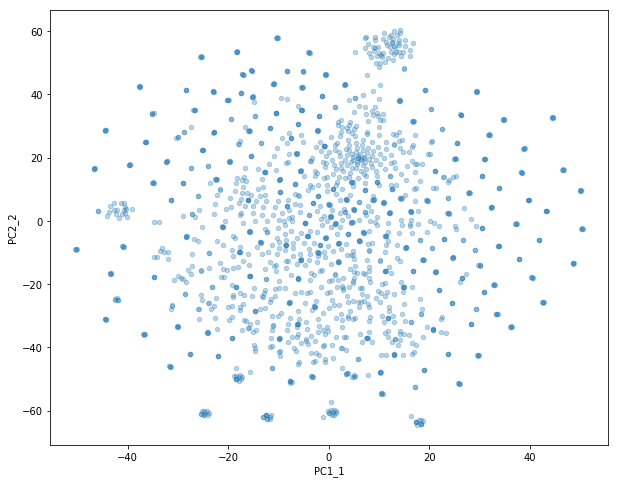

In [34]:
df['PC1_1'] = X_embedded.T[0]
df['PC2_2'] = X_embedded.T[1]
df.plot('PC1_1', 'PC2_2', kind='scatter', alpha=0.3, figsize=(10,8))

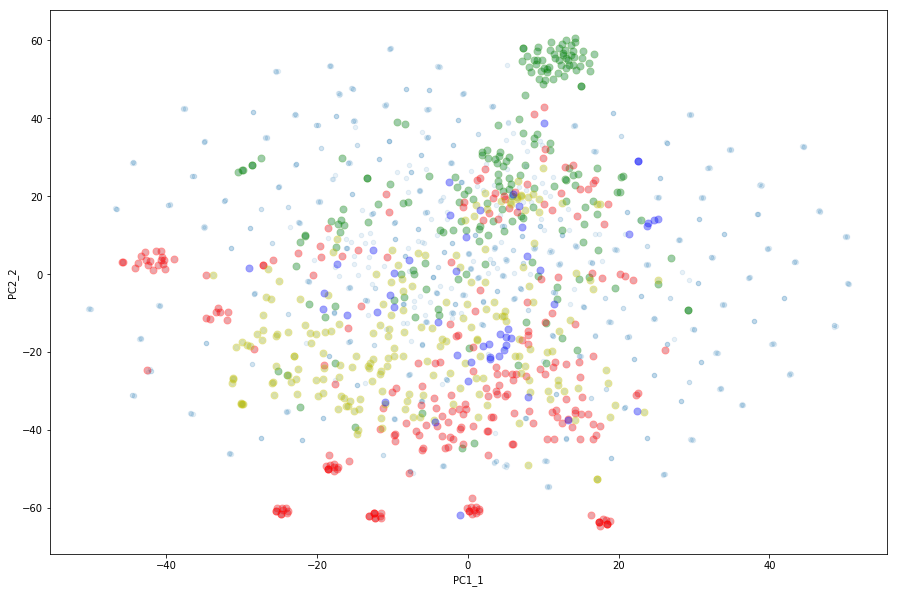

In [36]:
myax = df.plot('PC1_1', 'PC2_2', kind='scatter', alpha=0.1, figsize=(15,10))
df[df['colour']==5].plot('PC1_1', 'PC2_2', kind='scatter', color='green', ax=myax, alpha=0.3, s=50)
df[df['colour']==7].plot('PC1_1', 'PC2_2', kind='scatter', color='red', ax=myax, alpha=0.3, s=50)
df[df['colour']==0].plot('PC1_1', 'PC2_2', kind='scatter', color='y', ax=myax, alpha=0.3, s=50)
df[df['colour']==2].plot('PC1_1', 'PC2_2', kind='scatter', color='b', ax=myax, alpha=0.3, s=50)

# ÁªøËâ≤‰ª£Ë°®Á≤§ËèúÔºåÈªÑËâ≤‰ª£Ë°®ÊπòËèúÔºåÁ∫¢Ëâ≤‰ª£Ë°®Â∑ùËèúÔºåËìùËâ≤‰ª£Ë°®È≤ÅËèú

In [37]:
df_B=df[
    (df['PC1_1'] <-38)
    &
    (df['PC2_2'] > 0) & (df['PC1_2'] < 20)
]#value_counts()
#df_B Ê≥°Ëèú

In [40]:
df_C=df[
    (df['PC1_1'] > 0)&(df['PC1_1'] < 20)
    &
    (df['PC2_2'] > 50) 
]#['colour'].value_counts()
#df_CÂπøÂºèÊúàÈ•º